In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

In [10]:
#importing the weather dataframe
path = r'C:\Users\karim\Documents\machine learning'
df_weather= pd.read_csv(os.path.join(path, 'data', 'original Data', 'Dataset-weather-prediction-dataset-processed.csv'))


In [11]:
df_answers = pd.read_csv(os.path.join(path, 'data', 'original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [12]:
df_weather

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [13]:
df_answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Cleaning and shaping the dataframes

In [15]:
#cleaning and wrangling weather dataframe
# Drop all Gdansk, Roma,Tours columns inexistant in answers dataframe
cols_to_drop = [col for col in df_weather.columns if col.startswith(('GDANSK', 'ROMA', 'TOURS'))]
df_weather1 = df_weather.drop(columns=cols_to_drop)

In [16]:
df_weather1.shape

(22950, 149)

In [17]:
# Drop columns for the missing measurements (take a look at the previous exercise)
# Create a list of columns to drop
cols_to_drop_ = [col for col in df_weather1.columns if col.endswith(('wind_speed', 'snow_depth'))]

# Dropping
df_weather2 = df_weather1.drop(columns=cols_to_drop_)

In [18]:
df_weather2.shape

(22950, 134)

In [19]:
from collections import Counter

locations = [col.split('_')[0] for col in df_weather2.columns]
Counter(locations)

Counter({'BASEL': 9,
         'BELGRADE': 9,
         'BUDAPEST': 9,
         'DEBILT': 9,
         'DUSSELDORF': 9,
         'HEATHROW': 9,
         'LJUBLJANA': 9,
         'MAASTRICHT': 9,
         'MADRID': 9,
         'OSLO': 9,
         'SONNBLICK': 9,
         'VALENTIA': 9,
         'KASSEL': 8,
         'MUNCHENB': 8,
         'STOCKHOLM': 8,
         'DATE': 1,
         'MONTH': 1})

In [20]:
# Fill missing Kassel data with Ljubljana
for col in df_weather2.columns:
    if col.startswith('LJUBLJANA_'):
        feature = col.split('_', 1)[1]
        target_col = f'KASSEL_{feature}'
        if target_col not in df_weather2.columns:
            df_weather2[target_col] = df_weather2[col]

# Fill missing MunchenB data with Sonnblick
for col in df_weather2.columns:
    if col.startswith('SONNBLICK_'):
        feature = col.split('_', 1)[1]
        target_col = f'MUNCHENB_{feature}'
        if target_col not in df_weather2.columns:
            df_weather2[target_col] = df_weather2[col]

# Fill missing Stockholm data with Oslo
for col in df_weather2.columns:
    if col.startswith('OSLO_'):
        feature = col.split('_', 1)[1]
        target_col = f'STOCKHOLM_{feature}'
        if target_col not in df_weather2.columns:
            df_weather2[target_col] = df_weather2[col]

In [21]:
df_weather2.shape

(22950, 137)

In [82]:
# Export cleaned weather data with date included
df_weather2.to_csv(os.path.join(path, 'data', 'prepared Data','machine2_weather_clean_date_in.csv'), index=False)

In [22]:
weather_decade = df_weather2[
    (df_weather2['DATE'].astype(str).str[:4] >= '1990') &
    (df_weather2['DATE'].astype(str).str[:4] <= '1999')
]
weather_decade


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
10958,19900101,1,0,0.83,1.0217,0.60,0.00,7.2,-2.1,-3.6,...,1.0068,0.20,0.51,2.0,6.9,4.5,9.4,8,1.0321,0.76
10959,19900102,1,2,0.84,1.0238,0.48,0.00,2.3,-1.8,-3.9,...,1.0040,0.21,1.48,0.1,7.3,4.7,9.9,8,1.0348,0.73
10960,19900103,1,8,0.89,1.0231,0.20,0.00,0.0,-2.2,-4.2,...,1.0094,0.38,0.00,4.9,7.8,4.8,10.7,8,1.0361,0.75
10961,19900104,1,2,0.77,1.0265,0.54,0.00,5.6,-0.7,-3.1,...,1.0112,0.13,0.92,0.0,6.5,2.0,11.0,2,1.0423,0.91
10962,19900105,1,7,0.81,1.0286,0.23,0.04,0.2,0.0,-3.1,...,1.0108,0.20,0.56,1.2,9.4,7.2,11.7,6,1.0413,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,19991227,12,7,0.74,0.9953,0.28,1.93,1.0,5.0,1.5,...,0.9954,0.15,0.41,0.1,4.8,3.0,7.5,6,1.0143,0.88
14606,19991228,12,8,0.88,0.9956,0.13,1.22,0.0,2.4,1.0,...,1.0102,0.41,0.03,5.1,5.3,2.5,8.1,8,1.0029,0.88
14607,19991229,12,8,0.84,1.0162,0.21,0.11,0.1,1.8,1.0,...,1.0229,0.35,0.85,3.9,7.1,4.2,9.1,2,1.0299,0.87
14608,19991230,12,7,0.80,1.0276,0.26,0.01,0.5,1.1,-0.3,...,1.0171,0.14,0.27,0.0,8.4,5.5,11.2,6,1.0437,0.85


In [23]:
answers_decade = df_answers[
    (df_answers['DATE'].astype(str).str[:4] >= '1990') &
    (df_answers['DATE'].astype(str).str[:4] <= '1999')
]
answers_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
10958,19900101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10959,19900102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10960,19900103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10961,19900104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10962,19900105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,19991227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14606,19991228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14607,19991229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14608,19991230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# drop DATE and MONTH for the random forest

X = weather_decade.drop(columns=['DATE', 'MONTH']) 
y =answers_decade ['BELGRADE_pleasant_weather'].drop(columns=['DATE'])  # Example target variable
print ("The shape of X is:", X.shape)
print ("The shape of y is:", y.shape)

The shape of X is: (3652, 135)
The shape of y is: (3652,)


# Randon Forest Classifier Model

In [26]:
#Spliting data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739,)
(913, 135) (913,)


In [28]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9912376779846659


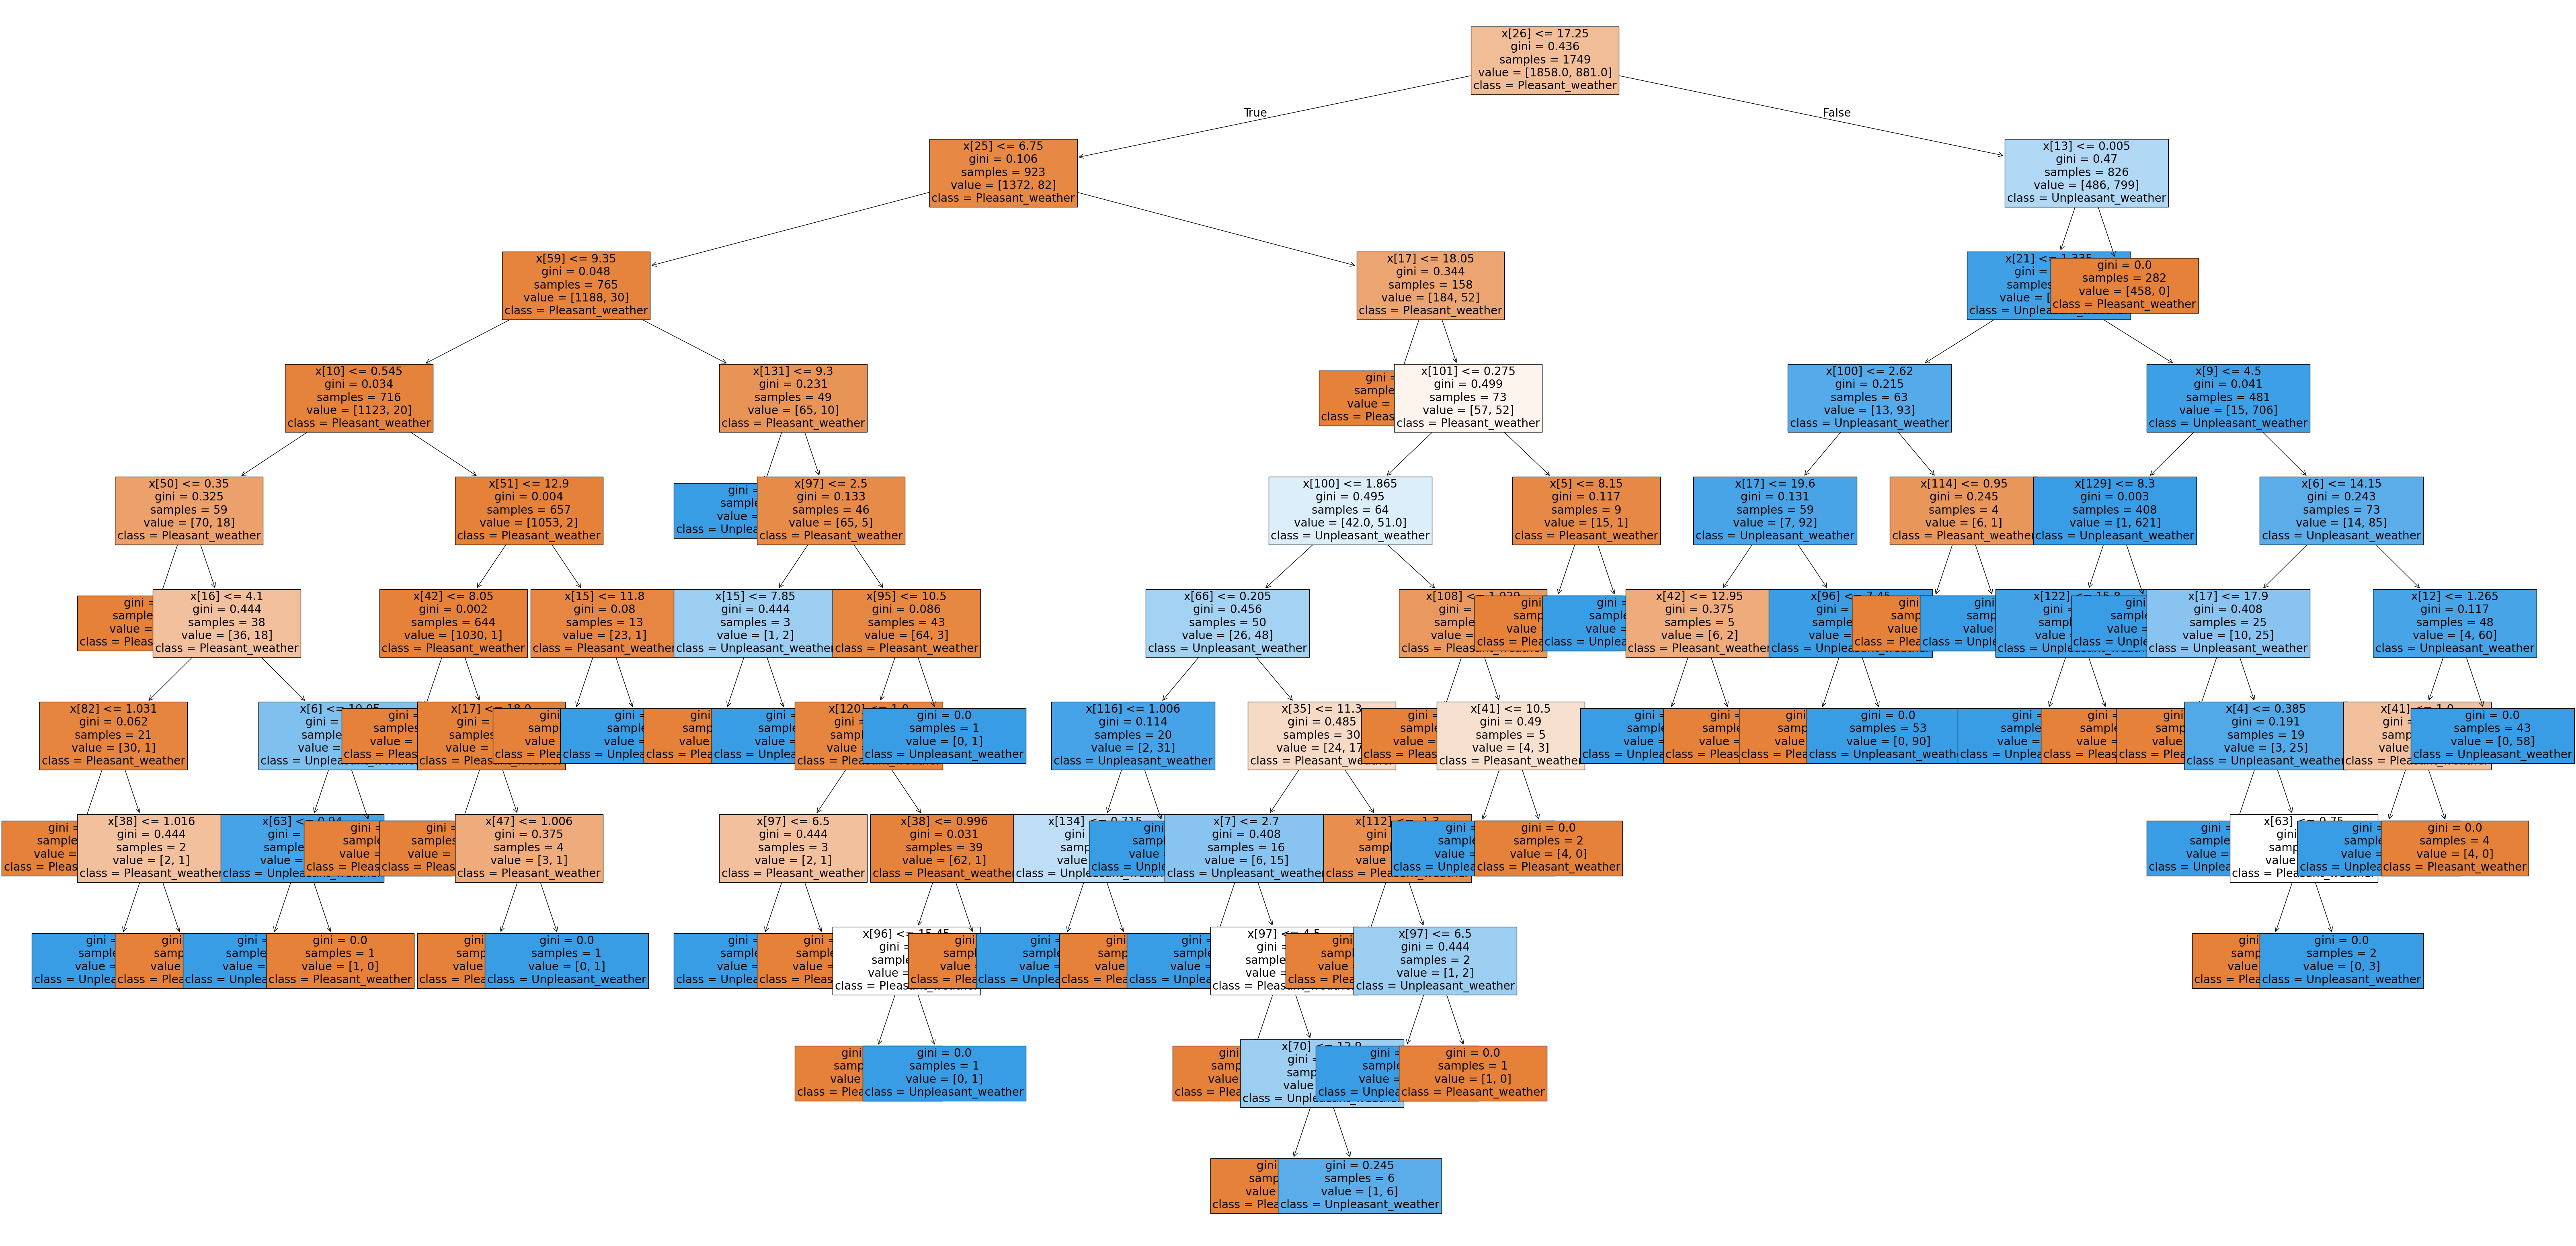

In [30]:
types = {0:'Pleasant_weather', 1:'Unpleasant_weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=types, filled=True);

# features importances

In [31]:
# Make a list (or better, a DataFrame) of feature importances
importances = clf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                     Feature  Importance
13    BELGRADE_precipitation    0.166264
17         BELGRADE_temp_max    0.097552
14         BELGRADE_sunshine    0.067536
15        BELGRADE_temp_mean    0.050497
68       LJUBLJANA_temp_mean    0.044443
..                       ...         ...
75  MAASTRICHT_precipitation    0.000732
40  DUSSELDORF_precipitation    0.000725
27        DEBILT_cloud_cover    0.000694
57      KASSEL_precipitation    0.000680
0          BASEL_cloud_cover    0.000411

[135 rows x 2 columns]


In [32]:
importances.shape

(135,)

In [89]:
#reshapig feature_importance list
X_reshaped = importances.reshape(-1, 15, 9)
print(X_reshaped.shape)

(1, 15, 9)


In [91]:
#collapsing the shape in one observation
collapsed = np.sum(X_reshaped[0], axis=1)
print(collapsed.shape)
print(collapsed)

(15,)
[0.02853438 0.48639451 0.115377   0.02101187 0.01367094 0.01425793
 0.03308141 0.09760047 0.01646786 0.01486523 0.06264334 0.02270453
 0.03839548 0.0175886  0.01740644]


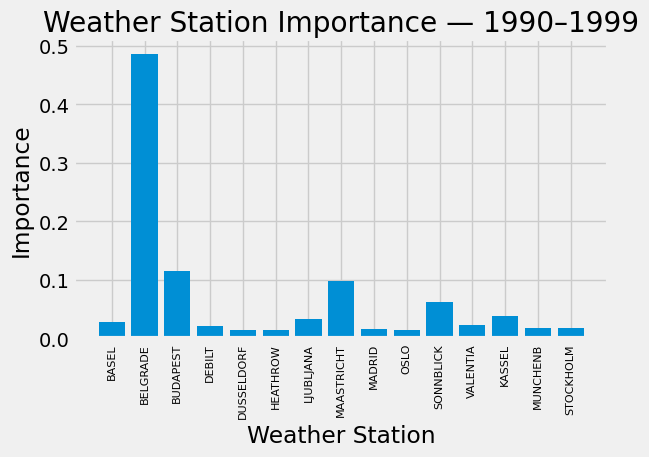

In [97]:
# Plotting

plt.style.use('fivethirtyeight')

x_values = list(range(len(collapsed)))  # 0 to 14
stations= ['BASEL',
         'BELGRADE',
         'BUDAPEST',
         'DEBILT',
         'DUSSELDORF',
         'HEATHROW',
         'LJUBLJANA',
         'MAASTRICHT',
         'MADRID',
         'OSLO',
         'SONNBLICK',
         'VALENTIA',
         'KASSEL',
         'MUNCHENB',
         'STOCKHOLM'
         ]
plt.bar(stations, collapsed )
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Importance')
plt.xlabel('Weather Station')
plt.title('Weather Station Importance — 1990–1999')
plt.tight_layout()
plt.show()